In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
all_train_data = pd.read_csv('alltrain.csv',)
all_test_data = pd.read_csv('alltest.csv')
#Preprocessed in XGBoost.ipynb

In [4]:
all_train_data

,Lat,Long,Time,Length,Start,End,Start_Hour,Start_Day,End_Hour,End_Day,Start_Min,Current_Hour,Current_Min,Current_Day,End_Min,Start_Sec,Current_Sec,End_Sec
0,40.58338,-73.85482,2019-01-17 13:20:02,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,20,17,50,2,2,13
1,40.57990,-73.86292,2019-01-17 13:21:04,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,21,17,50,2,4,13
2,40.57637,-73.87132,2019-01-17 13:22:07,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,22,17,50,2,7,13
3,40.57447,-73.88029,2019-01-17 13:23:09,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,23,17,50,2,9,13
4,40.57262,-73.88921,2019-01-17 13:24:11,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,24,17,50,2,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540039,48.80372,-122.72340,2019-01-03 15:28:30,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,28,3,32,17,30,37
3540040,48.80394,-122.72357,2019-01-03 15:29:31,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,29,3,32,17,31,37
3540041,48.80405,-122.72376,2019-01-03 15:30:34,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,30,3,32,17,34,37
3540042,48.80405,-122.72395,2019-01-03 15:31:36,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,31,3,32,17,36,37


# Estimated Day

In [36]:
X = all_train_data[['Lat', 'Long', 'Start_Hour', 'Start_Day', 'Start_Min', 'Start_Sec', 'Current_Hour', 'Current_Day', 'Current_Min', 'Current_Sec']]
y = all_train_data[['End_Day']]

In [37]:
idx = np.linspace(0, len(all_train_data)-1, 500, dtype=int)

In [38]:
idx

array([      0,    7094,   14188,   21282,   28377,   35471,   42565,
         49659,   56754,   63848,   70942,   78037,   85131,   92225,
         99319,  106414,  113508,  120602,  127696,  134791,  141885,
        148979,  156074,  163168,  170262,  177356,  184451,  191545,
        198639,  205733,  212828,  219922,  227016,  234111,  241205,
        248299,  255393,  262488,  269582,  276676,  283770,  290865,
        297959,  305053,  312148,  319242,  326336,  333430,  340525,
        347619,  354713,  361808,  368902,  375996,  383090,  390185,
        397279,  404373,  411467,  418562,  425656,  432750,  439845,
        446939,  454033,  461127,  468222,  475316,  482410,  489504,
        496599,  503693,  510787,  517882,  524976,  532070,  539164,
        546259,  553353,  560447,  567541,  574636,  581730,  588824,
        595919,  603013,  610107,  617201,  624296,  631390,  638484,
        645578,  652673,  659767,  666861,  673956,  681050,  688144,
        695238,  702

In [122]:
model1 = RandomForestRegressor(n_estimators=90)
model1.fit(X.to_numpy()[idx], y.to_numpy()[idx])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=90,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [123]:
X_test = all_test_data[['Lat', 'Long', 'Start_Hour', 'Start_Day', 'Start_Min', 'Start_Sec', 'Current_Hour', 'Current_Day', 'Current_Min', 'Current_Sec']].to_numpy()
X_test

array([[ 41.63358, -70.91505,   2.     , ...,  13.     ,  56.     ,
         14.     ],
       [ 41.63173, -70.91267,   2.     , ...,  13.     ,  57.     ,
         33.     ],
       [ 41.63008, -70.91059,   2.     , ...,  13.     ,  58.     ,
         43.     ],
       ...,
       [ 36.928  , -76.06717,  17.     , ...,   7.     ,  28.     ,
         21.     ],
       [ 36.92517, -76.0755 ,  17.     , ...,   7.     ,  29.     ,
         33.     ],
       [ 36.92183, -76.08517,  17.     , ...,   7.     ,  30.     ,
         57.     ]])

In [124]:
pred_day = model1.predict(X_test)

In [125]:
set(pred_day.astype(int))

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31}

In [126]:
from sklearn.metrics import mean_absolute_error
day_error = mean_absolute_error(pred_day.astype(int), all_test_data['End_Day'])

In [127]:
day_error

1.034867019410772

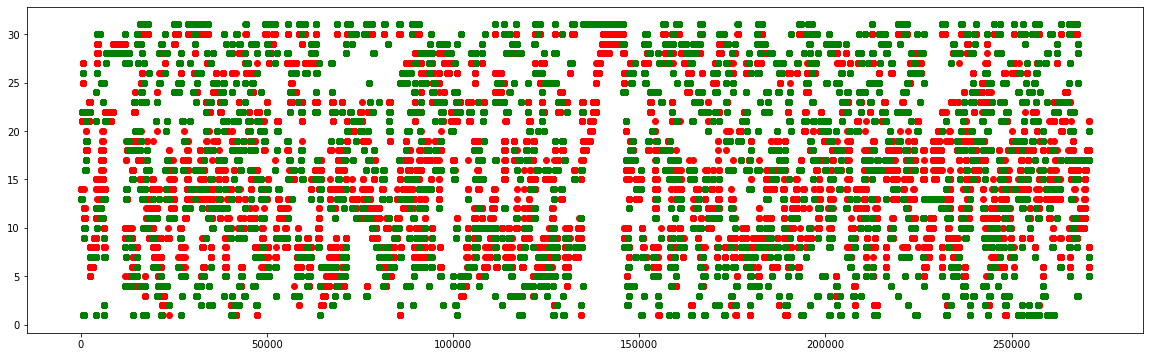

In [128]:
plt.figure(figsize=(20,6))
plt.scatter(np.arange(len(all_test_data)), pred_day.astype(int), color='r', label='pred')
plt.scatter(np.arange(len(all_test_data)), all_test_data['End_Day'], color='g', label='act')

In [131]:
EstimatedArrival = pd.DataFrame({'Day': pred_day.astype(int)}, columns=['Day'], index=None)

In [132]:
EstimatedArrival

,Day
0,13
1,13
2,13
3,13
4,14
...,...
270824,8
270825,8
270826,8
270827,8


# Estimated Hour

In [214]:
model2 = RandomForestRegressor(n_estimators=50, max_depth=30)
y2 = all_train_data['End_Hour']
idx2 = np.linspace(0, len(all_train_data)-1, 10000, dtype=int).tolist()
model2.fit(X.to_numpy()[idx2], y2.to_numpy()[idx2])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [206]:
pred_hr = model2.predict(X_test).astype(int)

In [207]:
set(pred_hr)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22}

In [208]:
EstimatedArrival['Hour'] = pred_hr

In [209]:
hr_error = mean_absolute_error(pred_hr, all_test_data['End_Hour'])

In [210]:
hr_error

5.098859427904693

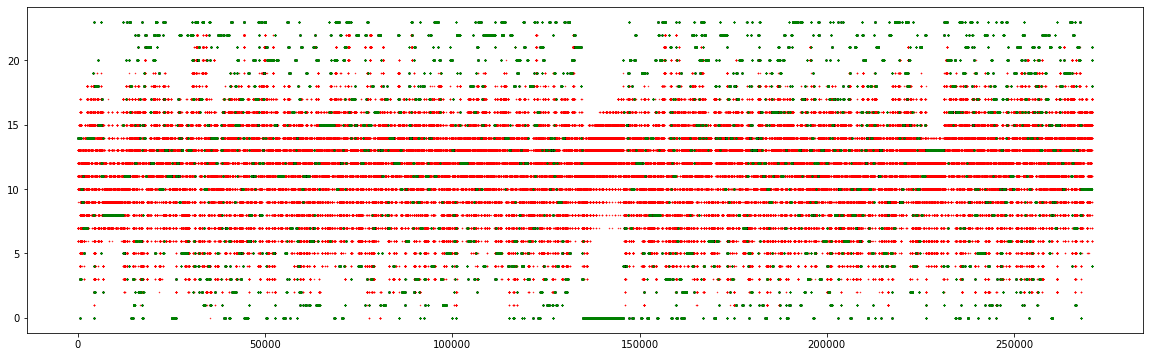

In [437]:
plt.figure(figsize=(20,6))
plt.scatter(np.arange(len(all_test_data)), pred_hr, color='r', label='pred', s = 0.2)
plt.scatter(np.arange(len(all_test_data)), all_test_data['End_Hour'], color='g', label='act', s = 0.2)

# Estimated Min

In [422]:
model3 = RandomForestRegressor(n_estimators=5)
y3 = all_train_data['End_Min']
idx3 = np.linspace(0, len(all_train_data)-1, 100000, dtype=int).tolist()
model3.fit(X.to_numpy()[idx3], y3.to_numpy()[idx3])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [423]:
pred_min = model3.predict(X_test).astype(int)

In [424]:
set(pred_min) #Minute model needs improvement.

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59}

In [425]:
EstimatedArrival['Min'] = pred_min

In [426]:
min_error = mean_absolute_error(pred_min, all_test_data['End_Min'])

In [427]:
min_error

16.10796480435995

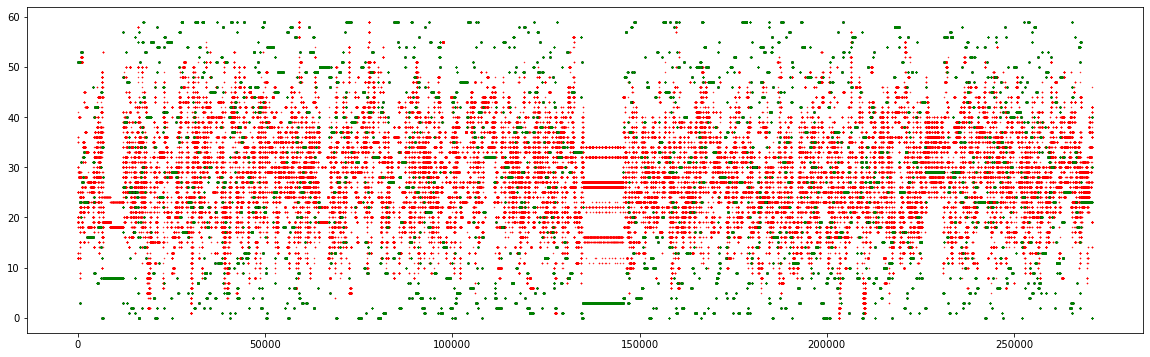

In [428]:
plt.figure(figsize=(20,6))
plt.scatter(np.arange(len(all_test_data)), pred_min, color='r', label='pred', s=0.2)
plt.scatter(np.arange(len(all_test_data)), all_test_data['End_Min'], color='g', label='act', s=0.2)

# Estimated Seconds

In [403]:
model4 = RandomForestRegressor(n_estimators=5)
y4 = all_train_data['End_Sec']
idx2 = np.linspace(0, len(all_train_data)-1, 60000, dtype=int).tolist()
model4.fit(X.to_numpy()[idx2], y4.to_numpy()[idx2])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [404]:
pred_sec = model4.predict(X_test).astype(int)

In [405]:
set(pred_sec) #Seconds model needs improvement.

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57}

In [429]:
EstimatedArrival['Sec'] = pred_sec

In [430]:
EstimatedArrival

,Day,Hour,Min,Sec
0,13,7,12,48
1,13,7,12,48
2,13,7,12,48
3,13,7,35,44
4,14,9,18,40
...,...,...,...,...
270824,8,17,19,24
270825,8,16,14,24
270826,8,18,19,21
270827,8,17,19,21


In [431]:
sec_error = mean_absolute_error(pred_sec, all_test_data['End_Sec'])

In [432]:
sec_error

16.44602682873695

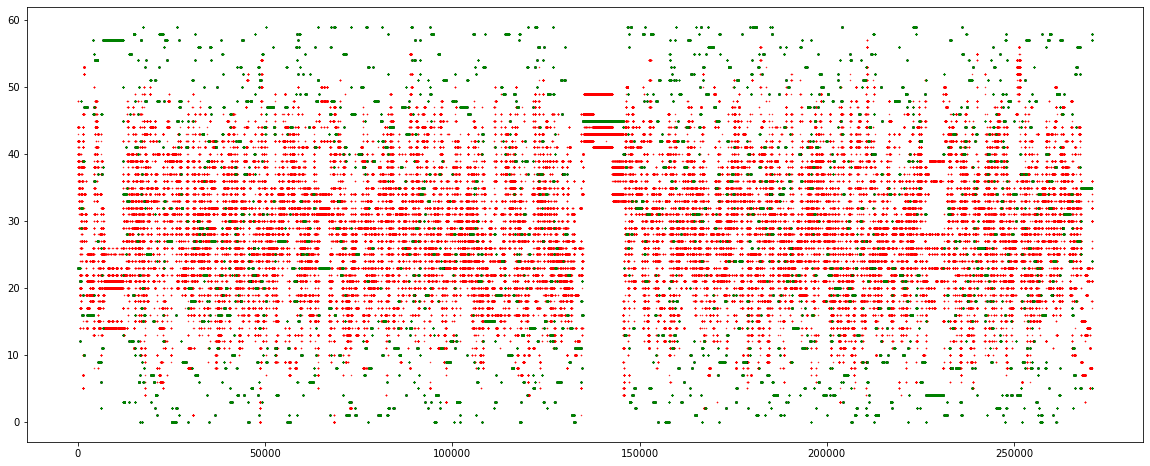

In [410]:
plt.figure(figsize=(20,8))
plt.scatter(np.arange(len(all_test_data)), pred_sec, color='r', label='pred', s=0.2)
plt.scatter(np.arange(len(all_test_data)), all_test_data['End_Sec'], color='g', label='act', s=0.2)
#Approach needs to be changed for this. 

In [433]:
import datetime
from datetime import datetime

def convert_to_day(estday, esthr, estmin, estsec):
    return datetime(2019, 1, estday, esthr, estmin, estsec)

In [434]:
EstimatedArrival

,Day,Hour,Min,Sec
0,13,7,12,48
1,13,7,12,48
2,13,7,12,48
3,13,7,35,44
4,14,9,18,40
...,...,...,...,...
270824,8,17,19,24
270825,8,16,14,24
270826,8,18,19,21
270827,8,17,19,21


In [435]:
est_arrival_object = []
for i in EstimatedArrival.values:
    obj = convert_to_day(i[0], i[1], i[2], i[3])
    est_arrival_object.append(obj)
result = pd.DataFrame(est_arrival_object, columns=['ETA'])
result.to_csv("Pred_ETA_RF.csv",index=None)

In [436]:
result

,ETA
0,2019-01-13 07:12:48
1,2019-01-13 07:12:48
2,2019-01-13 07:12:48
3,2019-01-13 07:35:44
4,2019-01-14 09:18:40
...,...
270824,2019-01-08 17:19:24
270825,2019-01-08 16:14:24
270826,2019-01-08 18:19:21
270827,2019-01-08 17:19:21


In [ ]:
# It is easier to predict hour, day than min or seconds. 